# Исследование туристической индустрии в России
Автор:  Юрий Кузнецов

Дата: 18.04.2025

## Введение



Целью данного исследования является изучение туризма в России и проверка гипотез, которые покажут динамику туристической индустрии: 
- в каких регионах России продают больше всего услуг,
- какие турпакеты пользуются популярностью и
- как изменились предпочтения туристов за последние годы.

Это позволит сервису предлагать пользователям более персонализированные маршруты и разрабатывать эффективные маркетинговые стратегии.
В распоряжении находятся данные агрегатора отелей в нескольких таблицах:
- `hotel.csv` — число гостиниц, хостелов, санаторно-курортных организаций и мест в них по субъектам Российской Федерации за 2018–2023 годы. 
- `count_person_hotel.csv` — число людей, размещённых в гостиницах по субъектам Российской Федерации в 2023 году. 
- `tour_firm.csv` — число оформленных турпакетов в 2018–2023 годы. 
- `tour_cost_2023.csv` — основные показатели деятельности туристических фирм по субъектам Российской Федерации в 2023 году.

## Задачи:

Шаг 1. Подготовка данных

- Привести названия столбцов данных к оптимальному формату.
- Проверить наличие пропусков, выяснить их причины и дать рекомендации как избежать их в дальнейшем.
- Проверить типы данных и дать рекомендации по их оптимизации
- Проверить числовые данные на корректность

Шаг 2. Исследовательский анализ данных

 - Изучить распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы.
 - Определите топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году.
 - Визуализировать динамику изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год.

Шаг 3. Проверка гипотез

- Провести статистический тест, который поможет определить, можно ли отвергнуть нулевую гипотезу в пользу альтернативной. Нулевая гипотеза: средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей. Алтернативная: этот показатель может быть больше.
- Проверить гипотезу, что в 2023 году, по сравнению с 2022, россияне стали чаще ездить по стране и оформлять турпакеты.

### Шаг 1. Подготовка данных

Подключим необходимые библиотеки

In [1]:
    try:
        import phik
    except ImportError:
        !pip install phik
        import phik 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import numpy as np

In [3]:
import scipy.stats as st

##### Загрузим данные

In [4]:
df_hotels = pd.read_csv('hotel.csv', sep = ';')

In [5]:
df_tour_costs = pd.read_csv('tour_cost_2023.csv', sep = ';')

In [6]:
df_tour_firm = pd.read_csv('tour_firm.csv', sep = ';')

In [7]:
df_count_person_hotel = pd.read_csv('count_person_hotel.csv', sep = ';')

##### Датасет df_hotels

In [8]:
df_hotels.head()

,Субъект,"Число гостиниц, 2018","Число гостиниц, 2019","Число гостиниц, 2020","Число гостиниц, 2021","Число гостиниц, 2022","Число гостиниц, 2023","Число мест в гостиницах, 2018","Число мест в гостиницах, 2019","Число мест в гостиницах, 2020",...,"Число санаторно-курортных организаций, 2020","Число санаторно-курортных организаций, 2021","Число санаторно-курортных организаций, 2022","Число санаторно-курортных организаций, 2023","Число мест в санаторно-курортных организациях, 2018","Число мест в санаторно-курортных организациях, 2019","Число мест в санаторно-курортных организациях, 2020","Число мест в санаторно-курортных организациях, 2021","Число мест в санаторно-курортных организациях, 2022","Число мест в санаторно-курортных организациях, 2023"
0,Белгородская область,97,101,103,100,101,99,4753,5144,5390,...,11,11,11,11,1969,1938,1969,1969,2212,1999
1,Брянская область,74,78,86,92,91,93,3436,3507,3782,...,14,14,14,13,2953,2829,2430,2837,2672,2937
2,Владимирская область,100,100,114,119,121,125,7679,8059,8815,...,6,8,9,8,1220,1324,1205,1530,1542,1328
3,Воронежская область,141,147,151,163,170,179,9605,10419,10040,...,15,15,14,14,3241,3302,3320,3320,3243,3337
4,Ивановская область,48,52,55,74,64,59,2774,2998,3009,...,14,17,15,15,4347,4341,4485,4616,4396,4293


Меняем названия столбцов на формат snake_case

In [9]:
df_hotels = df_hotels.rename(columns = {'Субъект': 'region'})

df_hotels.columns = df_hotels.columns.str.replace('Число гостиниц, ', 'hotels_count_')
df_hotels.columns = df_hotels.columns.str.replace('Число мест в гостиницах, ', 'hotels_places_count_')

df_hotels.columns = df_hotels.columns.str.replace('Число хостелов, ', 'hostels_count_')
df_hotels.columns = df_hotels.columns.str.replace('Число мест в хостелах, ', 'hostels_places_count_')

df_hotels.columns = df_hotels.columns.str.replace('Число санаторно-курортных организаций, ', 'resort_count_')
df_hotels.columns = df_hotels.columns.str.replace('Число мест в санаторно-курортных организациях, ', 'resort_places_count_')

Проверим типы данных

In [10]:
df_hotels.dtypes

region                       object
hotels_count_2018             int64
hotels_count_2019             int64
hotels_count_2020             int64
hotels_count_2021             int64
hotels_count_2022             int64
hotels_count_2023             int64
hotels_places_count_2018      int64
hotels_places_count_2019      int64
hotels_places_count_2020      int64
hotels_places_count_2021      int64
hotels_places_count_2022      int64
hotels_places_count_2023      int64
hostels_count_2018            int64
hostels_count_2019            int64
hostels_count_2020            int64
hostels_count_2021            int64
hostels_count_2022            int64
hostels_count_2023            int64
hostels_places_count_2018    object
hostels_places_count_2019    object
hostels_places_count_2020    object
hostels_places_count_2021    object
hostels_places_count_2022    object
hostels_places_count_2023    object
resort_count_2018             int64
resort_count_2019             int64
resort_count_2020           

In [54]:
df_hotels['resort_places_count_2018'].unique()

array([ 1969,  2953,  1220,  3241,  4347,  2364,  1909,  1507,     1,
       21382,  2229,  2431,  1205,  3340,  3378,  3496,  2183,   821,
        1237,  1745,  2522,  3311,  3142,  1092,  2032,  1422,  7119,
         517, 43885, 98378,  3409,  7234,  3093,  4830,   774, 31445,
       11736,  1901,  1266,  9713,  4756,  3043,  7423,  3407,  6445,
        4241,  2100,  9408,  4398,  3391,  2801,  8293,  6923,  7332,
        1936,  7873,  5864,  4618,  6693,  6274,  3945,  1891,  1461,
        1475,  1133,  4093,  1960,  1118,   755,   797,   510])

Столбцы 'Число мест в хостелах' и 'Число мест в санаторно-курортных организациях' имеют некорректный тип данных object.
Корректируем типы данных и понижаем разрядность.

In [11]:
for col in df_hotels:   
    df_hotels[col] = pd.to_numeric(df_hotels[col], downcast = 'integer', errors='ignore')
    
df_hotels['region'] = df_hotels['region'].astype('category')
text_cols = df_hotels.select_dtypes(include='object').columns

for col in text_cols:
    df_hotels[col] = df_hotels[col].str.replace(r'[^\d.]', '', regex=True)
    df_hotels[col] = pd.to_numeric(df_hotels[col], downcast = 'integer', errors='ignore')

C:\Users\urize\AppData\Local\Temp\ipykernel_11924\3609104013.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_hotels[col] = pd.to_numeric(df_hotels[col], downcast = 'integer', errors='ignore')
C:\Users\urize\AppData\Local\Temp\ipykernel_11924\3609104013.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_hotels[col] = pd.to_numeric(df_hotels[col], downcast = 'integer', errors='ignore')


Посмотрим регионы с максимальным числом туристических объектов размещения

In [12]:
df_hotels.sort_values(by= 'hotels_count_2018', ascending = False).head()

,region,hotels_count_2018,hotels_count_2019,hotels_count_2020,hotels_count_2021,hotels_count_2022,hotels_count_2023,hotels_places_count_2018,hotels_places_count_2019,hotels_places_count_2020,...,resort_count_2020,resort_count_2021,resort_count_2022,resort_count_2023,resort_places_count_2018,resort_places_count_2019,resort_places_count_2020,resort_places_count_2021,resort_places_count_2022,resort_places_count_2023
31,Краснодарский край,1369,1369,1443,1662,1627,1896,151687,149634,165501,...,192,202,191,189,98378,99231,99538,102948,101771,105681
17,г. Москва,827,865,696,708,746,948,134705,138904,115207,...,16,20,24,22,2183,2873,2811,3142,3807,3633
27,г. Санкт-Петербург,706,644,518,557,544,554,71723,67923,68766,...,21,22,24,24,7119,6935,6490,6013,7094,5503
34,Ростовская область,364,359,320,334,369,383,16766,16603,15888,...,22,24,21,24,7234,8427,7915,7705,7339,9203
30,Республика Крым,352,365,429,518,514,561,31849,34616,39776,...,113,109,103,103,43885,43592,44151,44054,41950,43410


In [13]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   region                     81 non-null     category
 1   hotels_count_2018          81 non-null     int16   
 2   hotels_count_2019          81 non-null     int16   
 3   hotels_count_2020          81 non-null     int16   
 4   hotels_count_2021          81 non-null     int16   
 5   hotels_count_2022          81 non-null     int16   
 6   hotels_count_2023          81 non-null     int16   
 7   hotels_places_count_2018   81 non-null     int32   
 8   hotels_places_count_2019   81 non-null     int32   
 9   hotels_places_count_2020   81 non-null     int32   
 10  hotels_places_count_2021   81 non-null     int32   
 11  hotels_places_count_2022   81 non-null     int32   
 12  hotels_places_count_2023   81 non-null     int32   
 13  hostels_count_2018         81 non-nul

Датасет df_hotels содержит 81 строку и 37 столбцов. Пропусков нет

In [14]:
df_hotels.describe()

,hotels_count_2018,hotels_count_2019,hotels_count_2020,hotels_count_2021,hotels_count_2022,hotels_count_2023,hotels_places_count_2018,hotels_places_count_2019,hotels_places_count_2020,hotels_places_count_2021,...,resort_count_2020,resort_count_2021,resort_count_2022,resort_count_2023,resort_places_count_2018,resort_places_count_2019,resort_places_count_2020,resort_places_count_2021,resort_places_count_2022,resort_places_count_2023
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,144.098765,149.160494,149.037037,159.950617,164.148148,178.024691,10966.814815,11261.074074,11274.666667,12096.814815,...,21.617284,21.802469,21.481481,21.456790,5285.753086,5329.938272,5355.703704,5407.604938,5379.604938,5485.617284
std,189.850573,190.102502,186.703873,210.466975,209.092032,242.384249,23272.586894,23384.022458,23256.339677,25308.163929,...,28.607939,28.950570,28.162968,27.851862,12264.380681,12314.380568,12358.418066,12707.976991,12574.605488,12989.443675
min,10.000000,12.000000,12.000000,12.000000,11.000000,11.000000,402.000000,461.000000,512.000000,574.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,61.000000,63.000000,65.000000,65.000000,67.000000,72.000000,2930.000000,2998.000000,3040.000000,3352.000000,...,8.000000,8.000000,8.000000,8.000000,1205.000000,1199.000000,1114.000000,1082.000000,1050.000000,1031.000000
50%,87.000000,96.000000,100.000000,103.000000,111.000000,113.000000,4753.000000,5144.000000,4873.000000,5197.000000,...,14.000000,14.000000,13.000000,13.000000,2431.000000,2474.000000,2430.000000,2747.000000,2695.000000,2937.000000
75%,160.000000,175.000000,179.000000,204.000000,195.000000,212.000000,9605.000000,10138.000000,10484.000000,10500.000000,...,23.000000,23.000000,24.000000,24.000000,4618.000000,4790.000000,4840.000000,4786.000000,4662.000000,4438.000000
max,1369.000000,1369.000000,1443.000000,1662.000000,1627.000000,1896.000000,151687.000000,149634.000000,165501.000000,184431.000000,...,192.000000,202.000000,191.000000,189.000000,98378.000000,99231.000000,99538.000000,102948.000000,101771.000000,105681.000000


Аномальных значений для не наблюдается, данные в пределах ожидаемых показателей для всех полей. Максимальные значения для Краснодарского края, что вполне логично, если учитывать курорты Черноморского побережья.

##### Датасет df_tour_costs

In [15]:
df_tour_costs.head()

,Субъект,"Стоимость реализованных турпакетов в 2023 году, млн руб.","Стоимость турпакетов реализованных гражданам России по территории России в 2023 году, млн руб.","Стоимость турпакетов реализованных гражданам России по другим странам в 2023 году, млн руб."
0,Белгородская область,1731.9856000000002,451.745,1280.2406
1,Брянская область,1409.2361,455.8798,953.3563
2,Владимирская область,2619.7022,912.2325,1706.2733999999998
3,Воронежская область,2877.2381,688.3641,2188.874
4,Ивановская область,1906.7206999999999,612.5177,1294.203


Меняем названия полей на формат snake_case

In [16]:
df_tour_costs = df_tour_costs.rename(columns={ 'Субъект': 'region',
    'Стоимость реализованных турпакетов в 2023 году, млн руб.': 'total_tour_sales_2023', 
    'Стоимость турпакетов  реализованных гражданам России по территории России в 2023 году, млн руб.': 'domestic_tour_sales_2023',
    'Стоимость турпакетов  реализованных гражданам России по другим странам в 2023 году, млн руб.': 'international_tour_sales_2023'
})


In [17]:
df_tour_costs[df_tour_costs['region'] == 'г. Москва']

,region,total_tour_sales_2023,domestic_tour_sales_2023,international_tour_sales_2023
17,г. Москва,388215.5477,61611.1085,325476.7008


Типы данных

In [18]:
df_tour_costs.dtypes

region                           object
total_tour_sales_2023            object
domestic_tour_sales_2023         object
international_tour_sales_2023    object
dtype: object

Все данные в типе object. 
Приводим числовые к соответствующему типу.

In [19]:
df_tour_costs['region'] = df_tour_costs['region'].astype('category')
text_cols = df_tour_costs.select_dtypes(include='object').columns

for col in text_cols:
    df_tour_costs[col] = df_tour_costs[col].str.replace(',', '.', regex=True)
    df_tour_costs[col] = df_tour_costs[col].str.replace(r'[^\d.].', '', regex=True)
    df_tour_costs[col] = pd.to_numeric(df_tour_costs[col], errors='ignore')

C:\Users\urize\AppData\Local\Temp\ipykernel_11924\3446449852.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_tour_costs[col] = pd.to_numeric(df_tour_costs[col], errors='ignore')


In [20]:
df_tour_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   region                         87 non-null     category
 1   total_tour_sales_2023          85 non-null     float64 
 2   domestic_tour_sales_2023       85 non-null     float64 
 3   international_tour_sales_2023  85 non-null     float64 
dtypes: category(1), float64(3)
memory usage: 5.0 KB


Датасет df_tour_costs содержит 87 строк в 4 столбцах. Пропусков нет

Смотрим регионы с максимальными продажами туров

In [21]:
df_tour_costs.sort_values(by = 'total_tour_sales_2023', ascending = False).head(10)

,region,total_tour_sales_2023,domestic_tour_sales_2023,international_tour_sales_2023
17,г. Москва,388215.5477,61611.1085,325476.7008
9,Московская область,27151.9902,5059.5491,22081.5946
29,г. Санкт-Петербург,23785.7731,10176.0073,13211.9414
61,Тюменская область,14332.6665,2852.9022,11478.4233
60,Свердловская область,14271.0682,5029.2558,9230.5944
33,Краснодарский край,14250.5485,5754.7161,8464.1645
48,Республика Татарстан,13768.8762,3334.2739,10431.1633
51,Пермский край,12592.6389,5128.5544,7464.0845
53,Нижегородская область,11545.6481,5255.3996,6290.2485
73,Новосибирская область,10433.0335,2031.2164,8399.3291


Оценим корректность значений в столбцах

In [22]:
df_tour_costs.describe()

,total_tour_sales_2023,domestic_tour_sales_2023,international_tour_sales_2023
count,85.000000,85.000000,85.000000
mean,8579.186196,1985.398684,6571.790866
std,41961.924483,6763.784607,35177.807840
min,31.232000,10.294000,20.938000
25%,1098.784400,306.374200,673.603900
50%,2599.052900,630.467800,1652.386600
75%,4927.968000,1486.301200,3307.124000
max,388215.547700,61611.108500,325476.700800


Максимальные значения полей для г. Москва выглядят аномально нереалистичными, даже допуская что это крупнейший центр туризма страны. Однако если учитывать, что почти все туры по другим странам осуществляются через Москву, то эти значения оправданы.

##### Датасет df_tour_firm

In [23]:
df_tour_firm.head()

,Субъект,"Общее число турпакетов, реализованных населению, 2018","Общее число турпакетов, реализованных гражданам России по территории России, 2018","Общее число турпакетов, реализованных гражданам России по другим странам, 2018","Общее число турпакетов, реализованных гражданам других стран по территории России, 2018","Общее число турпакетов, реализованных населению, 2019","Общее число турпакетов, реализованных гражданам России по территории России, 2019","Общее число турпакетов, реализованных гражданам России по другим странам, 2019","Общее число турпакетов, реализованных гражданам других стран по территории России, 2019","Общее число турпакетов, реализованных населению, 2020",...,"Общее число турпакетов, реализованных гражданам России по другим странам, 2021","Общее число турпакетов, реализованных гражданам других стран по территории России, 2021","Общее число турпакетов, реализованных населению, 2022","Общее число турпакетов, реализованных гражданам России по территории России, 2022","Общее число турпакетов, реализованных гражданам России по другим странам, 2022","Общее число турпакетов, реализованных гражданам других стран по территории России, 2022","Общее число турпакетов, реализованных населению, 2023","Общее число турпакетов, реализованных гражданам России по территории России, 2023","Общее число турпакетов, реализованных гражданам России по другим странам, 2023","Общее число турпакетов, реализованных гражданам других стран по территории России, 2023"
0,Белгородская область,14138,4333,9805,NaN,20646,4772,15874,NaN,9694,...,9239.0,NaN,15222,8887,6165,170.0,17733,11803,5930.0,NaN
1,Брянская область,9444,4438,5004,2.0,10459,4966,5492,1,3435,...,3479.0,NaN,11591,8265,3326,NaN,10165,5377,4788.0,NaN
2,Владимирская область,23900,12294,11243,363.0,23065,11558,10394,1113,7334,...,6426.0,7,18288,11359,6924,5.0,22334,13588,8737.0,9.0
3,Воронежская область,14554,8124,6430,NaN,14464,4613,9851,NaN,6681,...,7923.0,NaN,20958,13608,7350,NaN,24993,14781,10212.0,NaN
4,Ивановская область,17049,6592,10457,NaN,17019,8327,8692,NaN,6477,...,4445.0,NaN,13637,8575,5062,NaN,18904,11002,7902.0,NaN


Переименовываем столбцы в соответствии с форматом snake_case

In [24]:
df_tour_firm = df_tour_firm.rename(columns = {'Субъект': 'region'})

df_tour_firm.columns = df_tour_firm.columns.str.replace('Общее число турпакетов, ', 'tours')
df_tour_firm.columns = df_tour_firm.columns.str.replace('реализованных гражданам России по территории России, ', '_domectic_to_all_citizens_')
df_tour_firm.columns = df_tour_firm.columns.str.replace('реализованных гражданам России по другим странам, ', '_intl_to_ru_citzens_')
df_tour_firm.columns = df_tour_firm.columns.str.replace('реализованных населению, ', '_')
df_tour_firm.columns = df_tour_firm.columns.str.replace('реализованных гражданам других стран по территории России, ', '_russia_to_foreign_citizens_')


Сортируем столбцы по категориям

In [25]:
df_tour_firm = df_tour_firm.reindex(columns=sorted(df_tour_firm.columns))

Посмотрим типы данных

In [26]:
df_tour_firm.dtypes

region                                    object
tours_2018                                object
tours_2019                                object
tours_2020                                object
tours_2021                                object
tours_2022                                object
tours_2023                                object
tours_domectic_to_all_citizens_2018       object
tours_domectic_to_all_citizens_2019       object
tours_domectic_to_all_citizens_2020       object
tours_domectic_to_all_citizens_2021       object
tours_domectic_to_all_citizens_2022       object
tours_domectic_to_all_citizens_2023       object
tours_intl_to_ru_citzens_2018             object
tours_intl_to_ru_citzens_2019             object
tours_intl_to_ru_citzens_2020             object
tours_intl_to_ru_citzens_2021            float64
tours_intl_to_ru_citzens_2022             object
tours_intl_to_ru_citzens_2023            float64
tours_russia_to_foreign_citizens_2018    float64
tours_russia_to_fore

Подавляющее большинство столбцов имеет некорректный тип.
Меняем типы данных на соответствующие их значениям и понижаем разрядность

In [27]:
df_tour_firm['region'] = df_tour_costs['region'].astype('category')
text_cols = df_tour_firm.select_dtypes(include='object').columns

for col in text_cols:
    df_tour_firm[col] = df_tour_firm[col].str.replace(',', '.', regex=True)
    df_tour_firm[col] = df_tour_firm[col].str.replace(r'[^\d.].', '', regex=True)
    df_tour_firm[col] = pd.to_numeric(df_tour_firm[col], errors='ignore')

for col in df_tour_firm.select_dtypes(include = 'number').columns: 
    df_tour_firm[col] = pd.to_numeric(df_tour_firm[col]).round().astype('Int64')
    df_tour_firm[col] = pd.to_numeric(df_tour_firm[col], downcast = 'integer')

C:\Users\urize\AppData\Local\Temp\ipykernel_11924\4237713711.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_tour_firm[col] = pd.to_numeric(df_tour_firm[col], errors='ignore')


Датасет df_tour_firm состоит из 82 сток и 25 столбцов. Имеются пропуски.

Выведем их число и долю от общего

In [28]:
missing_df_tour_firm = (pd.DataFrame({'Кол-во пропусков': df_tour_firm.isnull().sum(), 
                                        'Процент пропусков': round(df_tour_firm.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_df_tour_firm

,Кол-во пропусков,Процент пропусков
tours_russia_to_foreign_citizens_2022,40,48.800000
tours_russia_to_foreign_citizens_2023,39,47.600000
tours_russia_to_foreign_citizens_2020,39,47.600000
tours_russia_to_foreign_citizens_2021,39,47.600000
tours_russia_to_foreign_citizens_2019,23,28.000000
tours_russia_to_foreign_citizens_2018,20,24.400000
tours_2022,4,4.900000
tours_domectic_to_all_citizens_2018,4,4.900000
tours_domectic_to_all_citizens_2019,4,4.900000
tours_domectic_to_all_citizens_2020,4,4.900000


Пропуски содержатся в основном в столбцах с числом турпакетов, реализованных гражданам других стран по территории России. Они не случайны. По всей вероятности это регионы, не развитым туризмом для иностранных граждан. Их можно заменить на 0.


In [29]:
df_tour_firm[['tours_russia_to_foreign_citizens_2022', 
              'tours_russia_to_foreign_citizens_2020', 
              'tours_russia_to_foreign_citizens_2023', 
              'tours_russia_to_foreign_citizens_2021',
              'tours_russia_to_foreign_citizens_2018',
              'tours_russia_to_foreign_citizens_2019']]= df_tour_firm[['tours_russia_to_foreign_citizens_2022', 
                                                                         'tours_russia_to_foreign_citizens_2020', 
                                                                         'tours_russia_to_foreign_citizens_2023', 
                                                                         'tours_russia_to_foreign_citizens_2021',
                                                                         'tours_russia_to_foreign_citizens_2018',
                                                                         'tours_russia_to_foreign_citizens_2019']].fillna(0)


Остальные пропуски по-видимому случайны оставим чтобы не искажать данные при агрегации

Смотрим статистику значений

In [30]:
df_tour_firm.describe()

,tours_2018,tours_2019,tours_2020,tours_2021,tours_2022,tours_2023,tours_domectic_to_all_citizens_2018,tours_domectic_to_all_citizens_2019,tours_domectic_to_all_citizens_2020,tours_domectic_to_all_citizens_2021,...,tours_intl_to_ru_citzens_2020,tours_intl_to_ru_citzens_2021,tours_intl_to_ru_citzens_2022,tours_intl_to_ru_citzens_2023,tours_russia_to_foreign_citizens_2018,tours_russia_to_foreign_citizens_2019,tours_russia_to_foreign_citizens_2020,tours_russia_to_foreign_citizens_2021,tours_russia_to_foreign_citizens_2022,tours_russia_to_foreign_citizens_2023
count,78.0,78.0,78.0,79.0,78.0,80.0,78.0,78.0,78.0,79.0,...,78.0,80.0,79.0,81.0,82.0,82.0,82.0,82.0,82.0,82.0
mean,58742.025641,68328.75641,40049.038462,60887.696203,67656.358974,79600.1875,20957.307692,27014.910256,26833.589744,36150.772152,...,12979.846154,24283.125,28294.974684,37143.382716,4571.865854,3829.54878,224.54878,149.768293,129.304878,323.682927
std,141283.723795,211604.987208,189119.894661,256504.460901,275728.752186,346307.035325,39565.220008,77649.179465,125271.78369,138265.521414,...,63758.231818,118140.262248,150065.644948,198124.025833,20297.047534,16103.289993,907.43142,755.925013,646.093134,1664.319227
min,1184.0,1071.0,188.0,371.0,338.0,379.0,234.0,263.0,117.0,284.0,...,71.0,86.0,110.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,10657.25,12346.0,3761.0,6886.5,7683.25,9492.75,3457.25,3314.5,2351.25,3395.5,...,1458.75,2387.5,2918.5,4080.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,23364.5,23632.0,9806.5,16296.0,18852.0,22958.0,7937.5,8339.0,5386.0,8556.0,...,3208.0,6492.0,6924.0,8647.0,28.5,20.0,1.0,1.0,1.0,1.0
75%,52959.5,50117.25,23026.0,34168.0,42675.75,48563.0,21582.25,23331.25,17984.0,24272.5,...,6062.25,11375.25,11645.5,16219.0,601.75,429.75,31.75,20.75,9.5,20.0
max,1141105.0,1795809.0,1670985.0,2261448.0,2419418.0,3095421.0,233394.0,631769.0,1103909.0,1202624.0,...,563993.0,1056771.0,1337117.0,1790081.0,156099.0,116236.0,6823.0,6417.0,4937.0,12036.0


Значения в пределах допустимых диапазонов характерных данным показателям

Выведем регионы лидеры по количеству реализованных туров. Экстемально высокие характерны для Москвы.

In [31]:
df_tour_firm.sort_values(by = 'tours_2023', ascending = False).head(10)

,region,tours_2018,tours_2019,tours_2020,tours_2021,tours_2022,tours_2023,tours_domectic_to_all_citizens_2018,tours_domectic_to_all_citizens_2019,tours_domectic_to_all_citizens_2020,...,tours_intl_to_ru_citzens_2020,tours_intl_to_ru_citzens_2021,tours_intl_to_ru_citzens_2022,tours_intl_to_ru_citzens_2023,tours_russia_to_foreign_citizens_2018,tours_russia_to_foreign_citizens_2019,tours_russia_to_foreign_citizens_2020,tours_russia_to_foreign_citizens_2021,tours_russia_to_foreign_citizens_2022,tours_russia_to_foreign_citizens_2023
17,г. Москва,1141105,1795809,1670985,2261448,2419418,3095421,232453,631769,1103909,...,563993,1056771,1337117,1790081,47966,49758,3083,2053,4937,12036
27,Новгородская область,518939,599669,196458,391662,413982,391078,233394,272594,151813,...,37822,112123,107417,88802,156099,116236,6823,6417,2945,9122
31,Республика Калмыкия,168092,162368,83204,221688,222808,188450,112161,103589,68387,...,14543,46564,52419,50716,1147,5295,274,672,204,202
46,Республика Марий Эл,154525,155957,85680,84100,97019,172736,71607,72972,41333,...,44115,31927,40356,65067,1088,437,232,39,5,49
9,Московская область,90769,111280,65091,120704,115521,160256,36093,49639,28474,...,36585,68125,69241,99871,651,881,32,25,71,100
49,Удмуртская Республика,106450,89702,48803,96307,119245,151112,46655,51717,37410,...,11364,30276,31547,41122,9,49,29,4,3,0
58,Ульяновская область,170713,178593,74024,135940,133514,133601,53531,52493,40332,...,33691,61811,44203,48175,73,20,1,3,2,243
54,Оренбургская область,69299,67095,55763,85861,105688,130837,31764,27824,45240,...,10512,25320,22931,45530,11,1,11,0,0,0
34,Астраханская область,84987,100361,39892,54454,83020,116029,24457,37929,28394,...,11498,22215,19100,26096,359,16,0,1,18,12
59,Курганская область,75831,84992,31487,64160,73387,98785,21598,21330,16487,...,14999,39009,40629,57909,43,45,1,15,1,45


##### Датасет df_count_person_hotel

In [32]:
df_count_person_hotel.head()

,Субъект,"Численность лиц, размещенных в гостиницах в 2023 году","Численность граждан России, размещенных в гостиницах в 2023 году","Численность иностранных граждан, размещенных в гостиницах в 2023 году"
0,Белгородская область,180442,177536,2906
1,Брянская область,182217,173980,8237
2,Владимирская область,526768,517456,9312
3,Воронежская область,760489,732562,27927
4,Ивановская область,227632,225030,2602


Переименуем столбцы в соответствие snke_case

In [33]:
df_count_person_hotel = df_count_person_hotel.rename(columns={ 'Субъект': 'region',
    'Численность лиц, размещенных в гостиницах в 2023 году': 'hotel_guests_2023', 
    'Численность граждан России, размещенных в гостиницах в 2023 году': 'hotel_ru_guests_2023',
    'Численность иностранных граждан, размещенных в гостиницах в 2023 году': 'hotel_foreign_guests_2023'
})

Выводим типы данных

In [34]:
df_count_person_hotel.dtypes

region                       object
hotel_guests_2023             int64
hotel_ru_guests_2023          int64
hotel_foreign_guests_2023     int64
dtype: object

Приводим типы в соответсвие значениям и понижаем разрядность

In [35]:
df_count_person_hotel['region'] = df_count_person_hotel['region'].astype('category')

for col in df_count_person_hotel.select_dtypes(include = 'number').columns: 
    df_count_person_hotel[col] = pd.to_numeric(df_count_person_hotel[col]).round().astype('Int64')
    df_count_person_hotel[col] = pd.to_numeric(df_count_person_hotel[col], downcast = 'integer')

In [36]:
df_count_person_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   region                     82 non-null     category
 1   hotel_guests_2023          82 non-null     Int32   
 2   hotel_ru_guests_2023       82 non-null     Int32   
 3   hotel_foreign_guests_2023  82 non-null     Int32   
dtypes: Int32(3), category(1)
memory usage: 4.1 KB


Датасет составлен из 84 строк в 4 столбцах, пропусков нет

Выводим регионы с максимальным числом гостей 

In [37]:
df_count_person_hotel.sort_values(by = 'hotel_guests_2023', ascending = False).head()

,region,hotel_guests_2023,hotel_ru_guests_2023,hotel_foreign_guests_2023
17,г. Москва,9896299,8704963,1191336
31,Краснодарский край,5860753,5793042,67711
27,г. Санкт-Петербург,5129053,4753178,375875
9,Московская область,3047807,2920113,127694
46,Республика Татарстан,1956942,1906627,50315


Выводим статистику по датасету

In [38]:
df_count_person_hotel.describe()

,hotel_guests_2023,hotel_ru_guests_2023,hotel_foreign_guests_2023
count,82.0,82.0,82.0
mean,684119.890244,652632.804878,31487.085366
std,1375352.661578,1257496.203901,136937.782739
min,7664.0,7532.0,132.0
25%,179644.75,174658.0,2752.75
50%,304388.5,292815.0,7463.5
75%,665923.5,648871.0,15453.75
max,9896299.0,8704963.0,1191336.0


На распределение сильно влияют экстремальные выбросы крупнейших туристических регионов

##### Промежуточные выводы:
- Названия столбцов переименованы к snake_case
- Все данные приведены к оптимальному типу
- Пропуски где это необходимо заполнены
  
В результате предобработки получены 4 датасета, готовые для дальнейшего исследовательского анализа
- df_hotels
- df_tour_costs
- df_tour_firm
- df_count_person_hotel

Рекомендуется заполнять таблицы значениями соответствующих типов данных. В датасете df_tour_firm, в полях, связанных с турами для иностранных граждан, когда информация отсутствует, заполнять значением 0.

### Шаг 2. Исследовательский анализ данных

#### 2.1. Изучим распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы.

##### Создадим датасет для отелей

In [39]:
df_hotels_only = df_hotels.iloc[:, 1:7]

Строим диграмму размаха значений для числа отелей

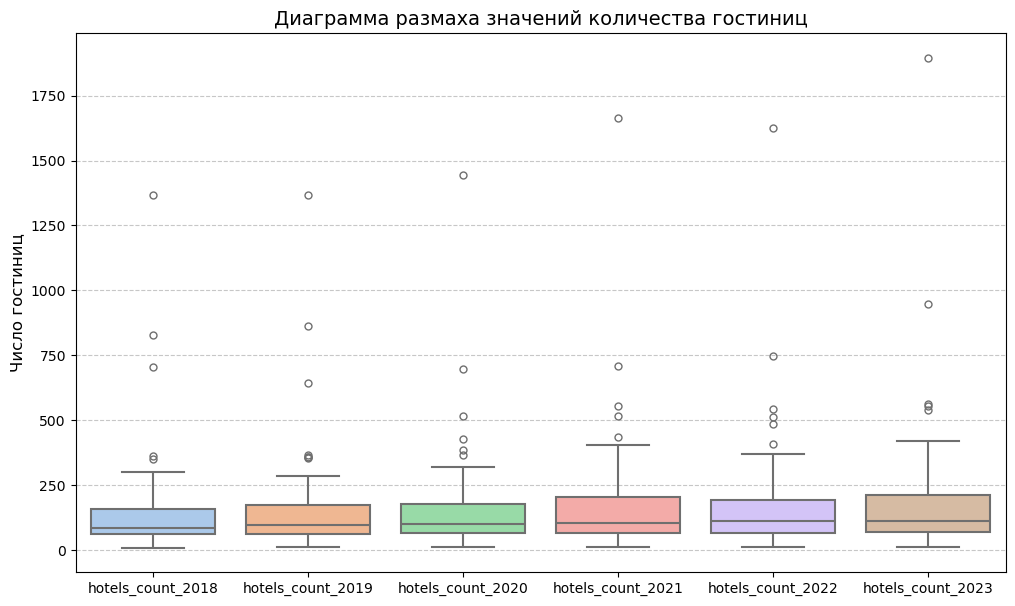

In [40]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_hotels_only, palette="pastel", linewidth=1.5, fliersize=5)
plt.title("Диаграмма размаха значений количества гостиниц", fontsize=14)
plt.ylabel("Число гостиниц", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Датасет для хостелов

In [41]:

df_hostels_only = df_hotels.iloc[:, 13:19]

In [42]:
df_hostels_max = df_hotels.sort_values(by = 'hostels_count_2023', ascending = False).head()  
df_hostels_max

,region,hotels_count_2018,hotels_count_2019,hotels_count_2020,hotels_count_2021,hotels_count_2022,hotels_count_2023,hotels_places_count_2018,hotels_places_count_2019,hotels_places_count_2020,...,resort_count_2020,resort_count_2021,resort_count_2022,resort_count_2023,resort_places_count_2018,resort_places_count_2019,resort_places_count_2020,resort_places_count_2021,resort_places_count_2022,resort_places_count_2023
17,г. Москва,827,865,696,708,746,948,134705,138904,115207,...,16,20,24,22,2183,2873,2811,3142,3807,3633
9,Московская область,301,354,366,437,484,540,35210,41143,40828,...,86,86,87,89,21382,21181,21579,21589,22012,22457
27,г. Санкт-Петербург,706,644,518,557,544,554,71723,67923,68766,...,21,22,24,24,7119,6935,6490,6013,7094,5503
31,Краснодарский край,1369,1369,1443,1662,1627,1896,151687,149634,165501,...,192,202,191,189,98378,99231,99538,102948,101771,105681
45,Республика Татарстан,291,286,269,250,276,313,23357,23720,22994,...,44,48,52,50,9713,9555,9197,10203,10814,10502


Построим диаграмму размаха значений числа хостелов

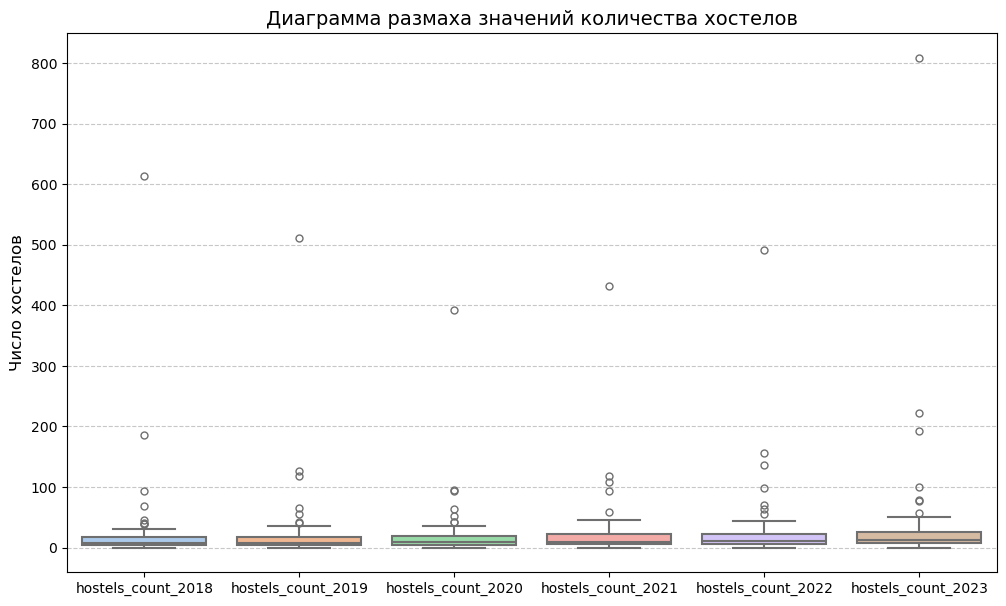

In [43]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_hostels_only, palette="pastel", linewidth=1.5, fliersize=5)
plt.title("Диаграмма размаха значений количества хостелов", fontsize=14)
plt.ylabel("Число хостелов", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Создадим датасет с числом санаторно-курортных комплексов

In [44]:
df_resorts_only = df_hotels.iloc[:, 25:31]

Выведем регионы лидеры по санаторно-курортным комплексам

In [45]:
df_resorts_max = df_hotels.sort_values(by = 'resort_count_2020', ascending = False).head(3)  
df_resorts_max

,region,hotels_count_2018,hotels_count_2019,hotels_count_2020,hotels_count_2021,hotels_count_2022,hotels_count_2023,hotels_places_count_2018,hotels_places_count_2019,hotels_places_count_2020,...,resort_count_2020,resort_count_2021,resort_count_2022,resort_count_2023,resort_places_count_2018,resort_places_count_2019,resort_places_count_2020,resort_places_count_2021,resort_places_count_2022,resort_places_count_2023
31,Краснодарский край,1369,1369,1443,1662,1627,1896,151687,149634,165501,...,192,202,191,189,98378,99231,99538,102948,101771,105681
41,Ставропольский край,256,267,264,276,298,321,11520,11702,11727,...,117,114,115,114,31445,31085,30782,31184,32773,32143
30,Республика Крым,352,365,429,518,514,561,31849,34616,39776,...,113,109,103,103,43885,43592,44151,44054,41950,43410


Построим диаграмму размаха значений `df_resorts_only`

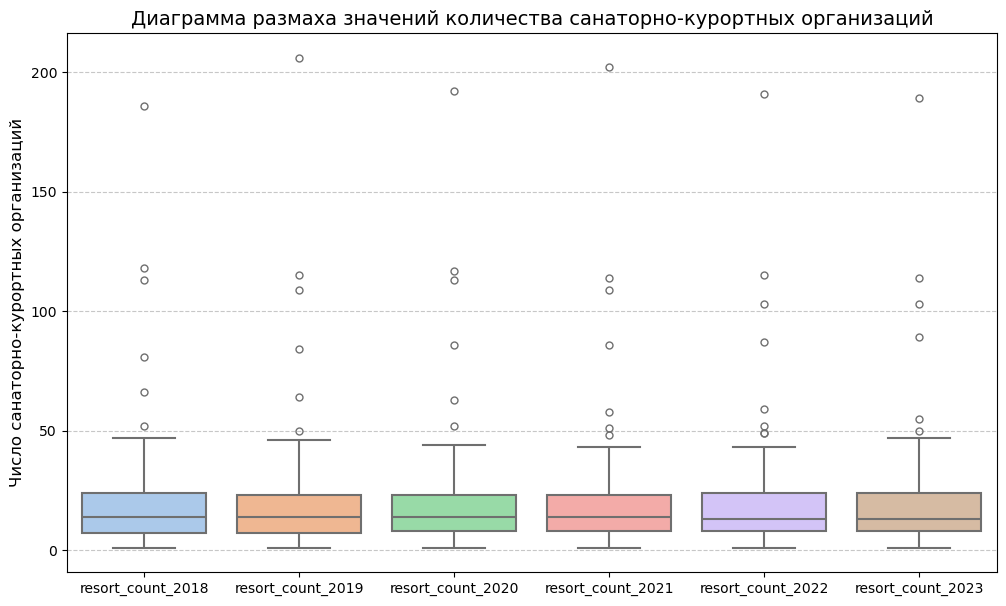

In [46]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_resorts_only, palette="pastel", linewidth=1.5, fliersize=5)
plt.title("Диаграмма размаха значений количества санаторно-курортных организаций", fontsize=14)
plt.ylabel("Число санаторно-курортных организаций", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

На всех диаграммах размаха количества объектов размещения туристов наблюдаются экстемальные выбросы, которые более чем на порядок превышают типичные значения в диапазоне IQR и соответствуют крупнейшим туристическим регионам. Таким как: г. Москва, Московская область, г. Санкт-Петербург, Краснодарский край, Ставропольский край, Республика Крым. 
В особенности значения распределены неравномерно для количества хостелов, которых значительно певосходящее число в Москве и Московской области.

#### 2.2. Топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году.

Создадим датасет регионов Росии с наибольшей стоимостью турпакетов

In [47]:
dt_top_tour_sales = df_tour_costs[['region', 'total_tour_sales_2023']].sort_values(by = 'total_tour_sales_2023', ascending = False).head(10).reset_index()

dt_top_tour_sales['total_tour_sales_2023'] = dt_top_tour_sales['total_tour_sales_2023'].apply(lambda x: round(x / 1000, 2))
dt_top_tour_sales = dt_top_tour_sales.sort_values(by = 'total_tour_sales_2023')

Визуализируем в виде линейчатой диаграммы

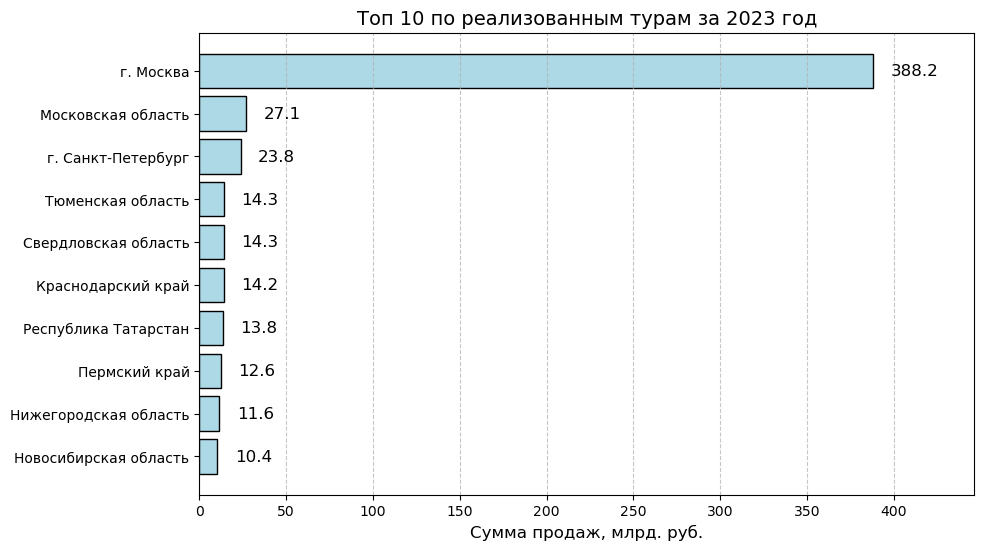

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(
    dt_top_tour_sales["region"], 
    dt_top_tour_sales["total_tour_sales_2023"], 
    color="lightblue", 
    edgecolor="black"
)
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 10,           
        bar.get_y() + bar.get_height()/2,
        f"{width:.1f}", 
        ha="left", 
        va="center",
        fontsize=12
    )
ax.set_title("Топ 10 по реализованным турам за 2023 год", fontsize=14)
ax.set_xlabel("Сумма продаж, млрд. руб.", fontsize=12)
ax.set_xlim(0, max(dt_top_tour_sales["total_tour_sales_2023"]) * 1.15)

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Общая стоимость реализованных турпакетов в г. Москва составляет 388.2 млрд. рублей более чем на порядок превосходит значения для других регионов, что обусловлено транзитом туристов в другие страны. Московская область (27,1 млрд. руб.) и Санкт-Петербург (23,8 млрд. руб.) также находятся в тройке лидеров.

#### 2.3. Линейный график изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год.

Создаем списки по категориям и датасет содержащий средние значения полей в категориях по годам

In [57]:
tour_year_list = df_tour_firm.iloc[:, 1:7].columns.str.replace('tours_', '').tolist()
int_list = [int(x) for x in tour_year_list]

mean_count_tours = df_tour_firm.iloc[:,1:7].mean().tolist()
mean_count_tours = [int(x) for x in mean_count_tours]

mean_tours_domectic_to_all = df_tour_firm.iloc[:,7:13].mean().tolist()
mean_tours_domectic_to_all = [int(x) for x in mean_tours_domectic_to_all]

mean_tours_russia_to_foreign_citizens = df_tour_firm.iloc[:,19:25].mean().tolist()
mean_tours_russia_to_foreign_citizens = [int(x) for x in mean_tours_russia_to_foreign_citizens]

mean_tours_intl_to_ru_citzens = df_tour_firm.iloc[:,13:19].mean().tolist()
mean_tours_intl_to_ru_citzens = [int(x) for x in mean_tours_intl_to_ru_citzens]

df_avg_tours = pd.DataFrame({'Год': int_list,
                             'Среднее число туров': mean_count_tours,
                             'Среднее число туров по России для россиян': mean_tours_domectic_to_all,
                             'Среднее число туров по России для иностранцев': mean_tours_russia_to_foreign_citizens,
                             'Среднее число туров по другим странам для россиян': mean_tours_intl_to_ru_citzens})

Визуализируем в виде линейных графиков на одних осях 

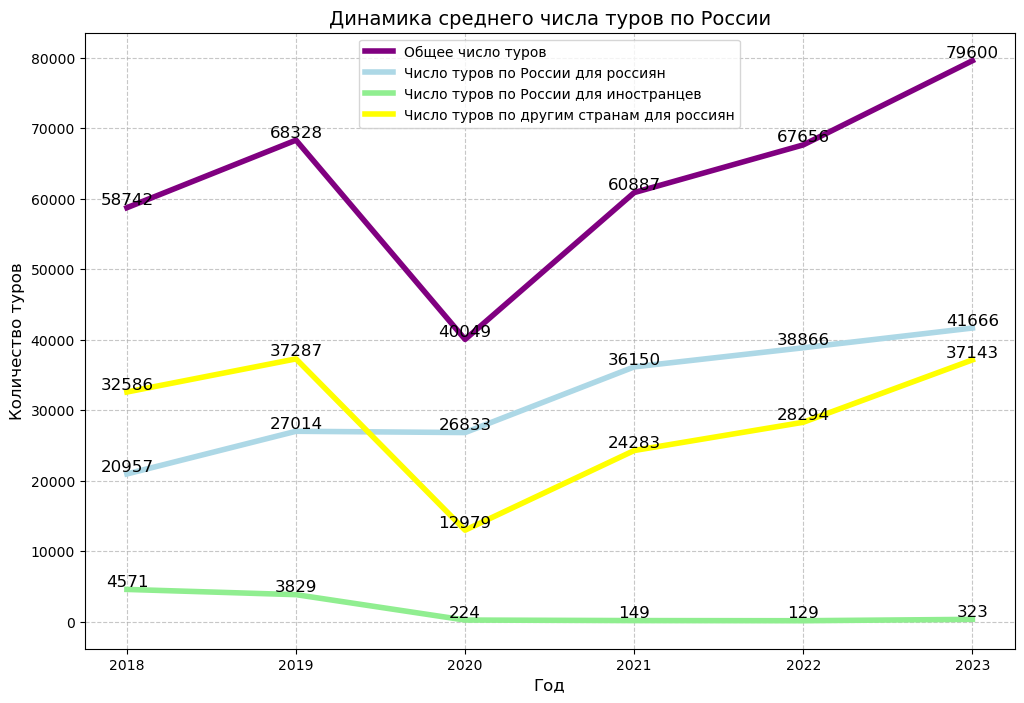

In [61]:
plt.figure(figsize=(12, 8))

plt.plot(
    df_avg_tours['Год'], 
    df_avg_tours['Среднее число туров'], 
    color='purple', 
    linewidth=4, 
    label='Общее число туров'
)
for xi, yi in zip(df_avg_tours['Год'], df_avg_tours['Среднее число туров']):
    plt.text(
        xi, yi + 0.5,          
        f"{yi}",               
        ha='center',            
        va='bottom',            
        fontsize=12,
        color='black'
    )
plt.plot(
    df_avg_tours['Год'], 
    df_avg_tours['Среднее число туров по России для россиян'], 
    color='lightblue', 
    linewidth=4, 
    label='Число туров по России для россиян'
)
for xi, yi in zip(df_avg_tours['Год'], df_avg_tours['Среднее число туров по России для россиян']):
    plt.text(
        xi, yi + 0.5,          
        f"{yi}",               
        ha='center',            
        va='bottom',            
        fontsize=12,
        color='black'
    )
plt.plot(
    df_avg_tours['Год'], 
    df_avg_tours['Среднее число туров по России для иностранцев'], 
    color='lightgreen', 
    linewidth=4, 
    label='Число туров по России для иностранцев'
)
for xi, yi in zip(df_avg_tours['Год'], df_avg_tours['Среднее число туров по России для иностранцев']):
    plt.text(
        xi, yi + 0.5,          
        f"{yi}",               
        ha='center',            
        va='bottom',            
        fontsize=12,
        color='black'
    )
plt.plot(
    df_avg_tours['Год'], 
    df_avg_tours['Среднее число туров по другим странам для россиян'], 
    color='yellow', 
    linewidth=4, 
    label='Число туров по другим странам для россиян'
)
for xi, yi in zip(df_avg_tours['Год'], df_avg_tours['Среднее число туров по другим странам для россиян']):
    plt.text(
        xi, yi + 0.5,          
        f"{yi}",               
        ha='center',            
        va='bottom',            
        fontsize=12,
        color='black'
    )
plt.title('Динамика среднего числа туров по Росcии', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество туров', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()  

plt.show()  

На графиках для всех категорий очевиден спад или стагнация во время пандемии 2020 году. Особенно резко сократилось число туров в Россию из-за рубежа, в 15 раз (c 3829 в 2019 г. до 224 в 2020 г.). Число внутренних туров по России в этот период не изменилось относительно предыдущего года (27014 в 2019 г. и 26833 в 2020 г.) . После пандемии для российских туристов наблюдается существенный рост среднего числа внутренних туров и в другие страны с каждым годом вплоть до 2023 года. А среднее число туров в Россию для иностранцев после 2020 года не увелилось и продолжило снижаться до 2022, что связано с международной дестабтлизацией в связи с началом СВО, однако в 2023 году наблюдается небольшая тенденция к росту.

### Шаг 3. Проверка гипотез

#### 3.1. Нулевая гипотеза: средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей. 

Альтернативная: этот показатель может быть больше

In [51]:
df_sales_tours = df_tour_costs['total_tour_sales_2023'].dropna()          
expected_mean_sales = 800
alpha = 0.05
results = st.ttest_1samp(
    df_sales_tours, 
    expected_mean_sales,
    alternative='greater')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.04555478027114014
Отвергаем нулевую гипотезу


Действительно средняя стоимость реализуемых турпакетов в 2023 году статистически значимо выше заявленного значения 800 млн. руб. 

#### 3.2. Альтернативная гипотеза: в 2023 году, по сравнению с 2022, россияне стали чаще ездить по стране и оформлять турпакеты. 

Нулевая: этот показатель остался без изменений


По линейному графику виден рост среднего числа внутренних туров. 
Проверим это статистическим тестом. 

In [52]:
df_tours_22 = df_tour_firm['tours_domectic_to_all_citizens_2022'].dropna()
df_tours_23 = df_tour_firm['tours_domectic_to_all_citizens_2023'].dropna()
alpha = 0.05 
results = st.ttest_ind(
    df_tours_23, 
    df_tours_22,
    alternative='greater'
)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.44915342190717794
Не получилось отвергнуть нулевую гипотезу


Интересно, что статистичекий тест не смог опровергнуть нулевую гипотезу. То есть в 2023 году, по сравнению с 2022, россияне не стали чаще ездить по стране и оформлять турпакеты. Это связано с тем, что распределение значений числа туров в этих полях не имеет форму нормального и на средние значения влияют выбросы. 

### Итоговые выводы

#### Предобработка
Предоставленные данные нуждалсь в дополнительной подготовке для дальнейшего корректного анализа.
В результате предобработки было сделано следующее:
- Названия столбцов переименованы к snake_case
- Все данные приведены к оптимальному типу
- Пропуски где это необходимо заполнены
- получены 4 датасета, готовые для дальнейшего исследовательского анализа
`df_hotels`,
`df_tour_costs`,
`df_tour_firm`,
`df_count_person_hotel`,

#### Чтобы избежать ошибок на следующих этапах, рекомендуется 
- заполнять таблицы значениями соответствующих типов данных. Для целочисленных значений использовать формат `int`, для дробных `float64`
- Названия столбцов указывать в стандартном для исследовательского анализа формате snake_case
- Если показатель равен нулю, поле должно быть явно заполнено числом 0. Пустые значения или символы (например, "-", "н/д") не допускаются

#### Экстремальные выбросы на диаграммах размаха
- Наблюдаются значения, превышающие типичные показатели (IQR) более чем на порядок.
- Эти выбросы соответствуют крупнейшим туристическим регионам России.

##### Регионы с аномально высокими показателями:
Города федерального значения:
- г. Москва
- г. Санкт-Петербург
Области и края:
- Московская область
- Краснодарский край
- Ставропольский край
Республика:
- Республика Крым

#### Анализ стоимости реализованных турпакетов по регионам:
##### Абсолютный лидер:
- г. Москва: 388,2 млрд руб.
- Превышение над другими регионами: более чем на порядок.
- Причина аномалии: транзитный поток туристов через Москву в другие страны.

##### Топ-3 регионов по объему продаж турпакетов:
Регион	Стоимость турпакетов (млрд руб.)
1. г. Москва	388,2
2. Московская область	27,1
3. г. Санкт-Петербург	23,8
##### Ключевые выводы:
- Доминирование Москвы обусловлено её ролью как международного транспортного узла.
- Регионы-лидеры сосредоточены в Центральном и Северо-Западном федеральных округах.
- Резкий разрыв между Москвой и остальными регионами требует отдельного анализа (например, исключение Москвы при оценке "средних" показателей по РФ).

#### Динамика туризма в период пандемии и постпандемии
##### 1. Период пандемии (2020 г.):
Общий тренд:
- Спад или стагнация во всех категориях туризма.

##### Въездной туризм (в Россию):
- Резкое сокращение числа туров в 15 раз:

2019 г.: 3 829 туров → 2020 г.: 224 тура.
- Причина: закрытие границ, ограничения на въезд.

##### Внутренний туризм:
- Стабильность: 27 014 туров (2019 г.) → 26 833 туров (2020 г.).
- Причина: смещение спроса на локальные поездки из-за ограничений на выезд за рубеж.

##### 2. Постпандемийный период (2021–2023 гг.):
Рост спроса среди российских туристов:
- Увеличение среднего числа внутренних туров (ежегодный рост до 2023 г.).
- Рост числа выездных туров в другие страны.
- Причина: снятие ограничений, накопленный спрос, адаптация туррынка.

##### Въездной туризм (для иностранцев):
- Снижение продолжалось до 2022 г.: влияние геополитической напряженности (СВО*).
- 2023 г.: небольшой рост числа туров.
- Причины 2023 г.: частичное восстановление нишевых направлений, бизнес-туризм, упрощение визовых процедур для отдельных стран.

##### Ключевые факторы влияния
2020–2021 гг.:
- Пандемия COVID-19 → глобальные ограничения на перемещения.

2022–2023 гг.:
- Международная дестабилизация (СВО) → санкции, логистические сложности, имиджевые риски для России.
- Изменение структуры туристического потока: смещение в сторону Азии, Ближнего Востока.

#### Проверка гипотез


##### Люди не стали чаще ездить по России 🚫
- Тест не нашел разницы между 2022 и 2023 по числу туров.
- В чем подвох? Данные не нормальные — несколько «фанатов» с кучей поездок тянут среднее вверх. Смотри на медиану, а не среднее.

##### Что делать дальше:
- Анализировать сегменты (бюджет vs. премиум).
- Искать скрытые тренды (например, рост длительных туров).

##### Суть: 
Цены растут, но это не значит, что народ массово рванул в путешествия — статистика вводит в заблуждение из-за выбросов. 😉